In [0]:
import pandas as pd
import numpy
!pip install pmdarima
import pmdarima as pm
import scipy.stats as ss
from matplotlib import pyplot as plt

In [0]:
df = pd.read_csv('cl.csv')
df.shape



(5886, 21)

In [0]:

df['laptime']=df['laptime']*60
df.head()

,command,type,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,laptime,lap_status,best_laptime,best_lap,time_behind_leader,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,final_Rank
0,$C,U,1,1,3,1,0.713048,0.706132,42.7829,T,0.706132,1,0.014095,4,0.706132,Active,G,0,0,4,8.0
1,$C,U,1,1,3,2,1.398022,0.684973,41.0984,T,0.684973,2,0.019492,4,0.684973,Active,G,0,0,4,8.0
2,$C,U,1,1,3,3,2.082927,0.684905,41.0943,T,0.684905,3,0.024285,4,0.684905,Active,G,0,0,4,8.0
3,$C,U,1,1,3,4,2.768227,0.685300,41.1180,T,0.684905,3,0.028913,4,0.684905,Active,G,0,0,4,8.0
4,$C,U,1,1,3,5,3.452755,0.684528,41.0717,T,0.684528,5,0.031743,4,0.684528,Active,G,0,0,4,8.0


In [0]:
df.columns

Index(['command', 'type', 'rank', 'car_number', 'unique_id', 'completed_laps',
       'elapsed_time', 'last_laptime', 'laptime', 'lap_status', 'best_laptime',
       'best_lap', 'time_behind_leader', 'overall_rank',
       'overall_best_laptime', 'current_status', 'track_status',
       'pit_stop_count', 'last_pitted_lap', 'start_position', 'final_Rank'],
      dtype='object')

In [0]:
carnumber=sorted(df['car_number'].unique())
print(carnumber)

[1, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 59, 60, 64, 66, 88, 98]


In [0]:
# Assuming that pit stops are seasonal
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel


In [0]:
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, 
                                    return_conf_int=True)
    # # Weekly index
    # fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1], 
    #                        periods=n_periods, freq="W")
    # # Forecast series
    # fc_series = pd.Series(fc, index=fc_ind)
    return fc
    # # Upper and lower confidence bounds
    # lower_series = pd.Series(confint[:, 0], index=fc_ind)
    # upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # # Create plot
    # plt.figure(figsize=(10, 6))
    # plt.plot(timeseries)
    # plt.plot(fc_series, color="red")
    # plt.xlabel("date")
    # plt.ylabel(timeseries.name)
    # plt.fill_between(lower_series.index, 
    #                  lower_series, 
    #                  upper_series, 
    #                  color="k", 
    #                  alpha=0.25)
    # plt.legend(("past", "forecast", "95% confidence interval"),  
    #            loc="upper left")
    # plt.show()

In [0]:
pred_lap_time=[]
for item in carnumber:
  df_fil=df[df['car_number']==item]
  #laptime filter
  df_fil=df_fil[df_fil['completed_laps']<=10]
  df_fil.shape
  automodel = arimamodel(df_fil["laptime"])
  x=plotarima(1, df_fil["laptime"], automodel)
  pred_lap_time.append(x)
  

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=20.998, BIC=21.316, Time=0.155 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=17.610, BIC=17.769, Time=0.030 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=19.609, BIC=19.848, Time=0.052 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=19.605, BIC=19.844, Time=0.056 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=16.522, BIC=16.602, Time=0.010 seconds
Total fit time: 0.318 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=30.597, BIC=30.914, Time=0.120 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=27.334, BIC=27.492, Time=0.033 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=29.085, BIC=29.323, Time=0.027 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=29.132, BIC=29.370, Time=0.068 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=26.455, BIC=26.535, Time=0.009 seconds
Total fit time: 0.266 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=39.122, BIC=39.440, Time=0.168 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=35.839, BIC=35.998, Time=0.008 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=37.670, BIC=37.908, Time=0.028 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=37.376, BIC=37.614, Time=0.073 seconds
Near non-inverti

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=49.375, BIC=50.586, Time=0.145 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=49.549, BIC=50.154, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=47.719, BIC=48.627, Time=0.087 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=49.288, BIC=50.196, Time=0.032 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=105.809, BIC=106.112, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=52.558, BIC=53.769, Time=0.137 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=54.024, BIC=55.537, Time=0.155 seconds
Total fit time: 0.573 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=35.529, BIC=36.318, Time=0.074 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=31.988, BIC=32.383, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=33.614, BIC=34.206, Time=0.032 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=33.062, BIC=33.653, Time=0.107 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=30.751, BIC=30.948, Time=0.008 seconds
Total fit time: 0.236 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (co

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=33.526, BIC=34.002, Time=0.162 seconds
Total fit time: 0.550 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=14.702, BIC=15.912, Time=0.345 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=10.971, BIC=11.576, Time=0.017 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=12.877, BIC=13.784, Time=0.051 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=12.764, BIC=13.671, Time=0.049 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=104.755, BIC=105.057, Time=0.135 seconds
Total fit time: 0.603 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=37.533, BIC=37.851, Time=0.095 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=34.644, BIC=34.802, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=36.619, BIC=36.857, Time=0.038 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=35.595, BIC=35.834, Time=0.073 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to in

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=30.772, BIC=31.010, Time=0.097 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=28.978, BIC=29.058, Time=0.012 seconds
Total fit time: 0.255 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=39.337, BIC=40.126, Time=0.049 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=40.813, BIC=41.207, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=40.555, BIC=41.147, Time=0.035 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=39.421, BIC=40.013, Time=0.099 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=40.260, BIC=40.458, Time=0.010 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=38.428, BIC=39.414, Time=0.081 seconds
Fit ARIMA: (2, 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=37.030, BIC=37.268, Time=0.029 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=37.061, BIC=37.300, Time=0.034 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=34.585, BIC=34.665, Time=0.009 seconds
Total fit time: 0.147 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=27.545, BIC=27.863, Time=0.088 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=24.655, BIC=24.814, Time=0.012 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=25.547, BIC=25.785, Time=0.037 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=25.035, BIC=25.273, Time=0.143 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=23.640, BIC=23.719, Time=0.011 seconds
Total fit time: 0.301 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=43.677, BIC=44.887, Time=0.149 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=39.757, BIC=40.362, Time=0.006 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=41.751, BIC=42.659, Time=0.071 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=41.754, BIC=42.662, Time=0.036 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=105.290, BIC=105.593, Time=0.005 seconds
Total fit time: 0.273 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=16.488, BIC=16.806, Time=0.243 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=13.618, BIC=13.777, Time=0.014 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=15.184, BIC=15.422, Time=0.048 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=14.495, BIC=14.733, Time=0.113 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=12.193, BIC=12.272, Time=0.010 seconds
Total fit tim

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=17.400, BIC=17.717, Time=0.295 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=15.094, BIC=15.252, Time=0.014 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=16.171, BIC=16.409, Time=0.036 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=16.143, BIC=16.382, Time=0.063 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=14.481, BIC=14.560, Time=0.012 seconds
Total fit time: 0.435 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=14.682, BIC=15.000, Time=0.144 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=11.056, BIC=11.215, Time=0.027 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=13.041, BIC=13.279, Time=0.036 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=13.038, BIC=13.276, Time=0.040 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (co

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:386: ModelFitWarning: Unable to fit ARIMA for (1, 2, 2)x(0, 0, 0, 0); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residual

Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=19.891, BIC=20.208, Time=0.072 seconds
Fit ARIMA: (3, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=21.722, BIC=22.119, Time=0.106 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=22.740, BIC=23.216, Time=0.192 seconds
Total fit time: 1.039 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=44.346, BIC=45.135, Time=0.047 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=40.929, BIC=41.324, Time=0.006 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=42.434, BIC=43.026, Time=0.025 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=42.497, BIC=43.089, Time=0.036 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=40.155, BIC=40.352, Time=0.008 seconds
Total fit time: 0.130 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=49.509, BIC=50.719, Time=0.150 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=49.124, BIC=49.729, Time=0.007 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=48.162, BIC=49.069, Time=0.113 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=49.037, BIC=49.945, Time=0.028 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=105.853, BIC=106.155, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible startin

Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=50.980, BIC=52.191, Time=0.137 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=55.769, BIC=57.282, Time=0.169 seconds
Total fit time: 0.615 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=35.503, BIC=35.820, Time=0.064 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=31.768, BIC=31.926, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=33.550, BIC=33.789, Time=0.032 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=33.650, BIC=33.888, Time=0.116 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=31.434, BIC=31.513, Time=0.009 seconds
Total fit time: 0.239 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=39.486, BIC=40.275, Time=0.057 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=36.136, BIC=36.530, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=37.526, BIC=38.117, Time=0.027 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=37.001, BIC=37.592, Time=0.096 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=35.023, BIC=35.220, Time=0.009 seconds
Total fit time: 0.206 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=41.906, BIC=42.224, Time=0.057 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=37.981, BIC=38.139, Time=0.014 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=39.931, BIC=40.169, Time=0.030 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=39.752, BIC=39.990, Time=0.075 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=36.929, BIC=37.009, Time=0.010 seconds
Total fit time: 0.197 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=37.392, BIC=37.710, Time=0.112 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=34.625, BIC=34.783, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=36.625, BIC=36.863, Time=0.025 seconds
Fit ARIMA: (0, 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=38.233, BIC=38.551, Time=0.060 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=35.287, BIC=35.446, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=36.862, BIC=37.101, Time=0.028 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=37.337, BIC=37.575, Time=0.097 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=34.467, BIC=34.547, Time=0.015 seconds
Total fit time: 0.219 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=38.167, BIC=38.485, Time=0.065 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=35.733, BIC=35.892, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=36.881, BIC=37.119, Time=0.028 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=38.149, BIC=38.387, Time=0.066 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=34.805, BIC=34.885, Time=0.008 seconds
Total fit time: 0.185 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=38.513, BIC=39.723, Time=0.137 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=46.351, BIC=46.956, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=42.310, BIC=43.218, Time=0.113 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=42.144, BIC=43.052, Time=0.104 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=105.747, BIC=106.050, Time=0.005 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=39.779, BIC=41.292, Time=0.184 seconds
Near non-invertible roots for order (2, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Con

Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=91.696, BIC=93.209, Time=0.214 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=38.515, BIC=39.726, Time=0.106 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=46.449, BIC=47.659, Time=0.134 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=46.188, BIC=48.003, Time=0.280 seconds
Total fit time: 1.294 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=44.064, BIC=44.853, Time=0.069 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=40.586, BIC=40.980, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=42.070, BIC=42.662, Time=0.032 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=42.333, BIC=42.925, Time=0.046 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=40.604, BIC=40.802, Time=0.009 seconds
Total fit time: 0.173 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=50.631, BIC=51.841, Time=0.150 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=48.999, BIC=49.604, Time=0.007 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=49.736, BIC=50.643, Time=0.104 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=49.408, BIC=50.316, Time=0.035 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=105.618, BIC=105.921, Time=0.005 seconds
Total fit time: 0.306 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=42.852, BIC=44.063, Time=0.163 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=47.746, BIC=48.351, Time=0.007 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=44.521, BIC=45.429, Time=0.094 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=45.367, BIC=46.275, Time=0.040 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=105.782, BIC=106.085, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=49.165, BIC=50.678, Time=0.198 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=47.024, BIC=48.537, Time=0.208 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=42.378, BIC=43.589, Time=0.124 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=48.079, BIC=49.289, Time=0.146 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=42.729, BIC=44.545, Time=0.261 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=47.765, BIC=49.883, Time=0.292 seconds


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:386: ModelFitWarning: Unable to fit ARIMA for (2, 0, 3)x(0, 0, 0, 0); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Fit ARIMA: (2, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=nan, BIC=nan, Time=nan seconds


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:386: ModelFitWarning: Unable to fit ARIMA for (1, 0, 3)x(0, 0, 0, 0); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: (1, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=nan, BIC=nan, Time=nan seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=48.587, BIC=50.403, Time=0.230 seconds


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:386: ModelFitWarning: Unable to fit ARIMA for (3, 0, 3)x(0, 0, 0, 0); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=nan, BIC=nan, Time=nan seconds
Total fit time: 2.427 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=42.830, BIC=43.619, Time=0.046 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=40.361, BIC=40.755, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=41.422, BIC=42.014, Time=0.028 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=41.257, BIC=41.848, Time=0.040 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=39.734, BIC=39.932, Time=0.008 seconds
Total fit time: 0.138 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=35.122, BIC=35.440, Time=0.116 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=34.950, BIC=35.109, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=32.765, BIC=33.003, Time=0.033 seconds
Fit ARIMA: (0, 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


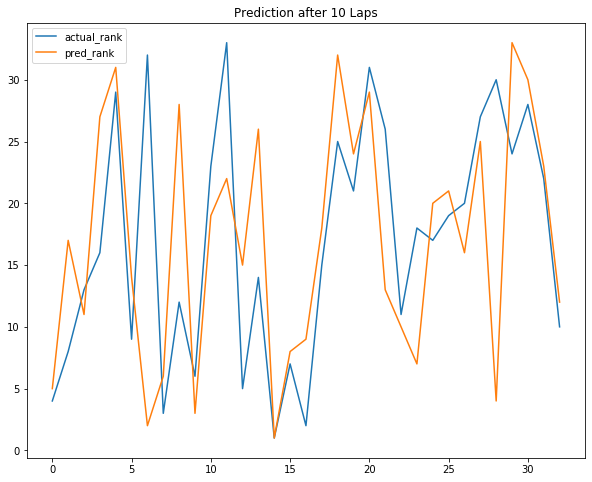

In [0]:
pred_lap_time = list(map(float,pred_lap_time))
pred=list(map(int,ss.rankdata(pred_lap_time)))
df_new=df[df['completed_laps']==11]
df_new=df_new.sort_values(by='car_number', ascending=True)
actual=df_new['overall_rank'].values.tolist()

fig = plt.figure(figsize=(10, 8))
plt.plot(actual,label='actual_rank')
plt.plot(pred,label="pred_rank")
plt.title('Prediction after 10 Laps')

plt.legend()

In [0]:
pred_lap_time=[]
for item in carnumber:
  df_fil=df[df['car_number']==item]
  #laptime filter
  df_fil=df_fil[df_fil['completed_laps']<=20]
  df_fil.shape
  automodel = arimamodel(df_fil["laptime"])
  x=plotarima(1, df_fil["laptime"], automodel)
  pred_lap_time.append(x)

pred_lap_time = list(map(float,pred_lap_time))


Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=25.865, BIC=29.427, Time=0.188 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=22.844, BIC=24.624, Time=0.035 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=24.704, BIC=27.375, Time=0.051 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=24.564, BIC=27.235, Time=0.069 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=21.893, BIC=22.783, Time=0.015 seconds
Total fit time: 0.377 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=48.167, BIC=51.945, Time=0.125 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=44.422, BIC=46.311, Time=0.019 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=46.422, BIC=49.256, Time=0.045 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=46.422, BIC=49.256, Time=0.057 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=43.119, BIC=44.063, Time=0.009 seconds
Total fit time: 0.263 seconds
Performing stepwise search to minimize aic
Fit AR

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=66.089, BIC=69.866, Time=0.056 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=66.379, BIC=68.268, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=64.366, BIC=67.200, Time=0.045 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=67.111, BIC=69.944, Time=0.046 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=66.299, BIC=67.244, Time=0.010 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=65.376, BIC=69.153, Time=0.063 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=66.230, BIC=70.952, Time=0.077 seconds
Total fit time: 0.318 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=52.901, BIC=56.679, Time=0.071 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=49.940, BIC=51.829, Time=0.019 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (co

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=8.688, BIC=11.675, Time=0.106 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=8.681, BIC=11.668, Time=0.045 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=207.564, BIC=208.560, Time=0.005 seconds
Total fit time: 0.283 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=57.532, BIC=61.515, Time=0.133 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=58.602, BIC=60.594, Time=0.029 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=59.267, BIC=62.254, Time=0.098 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=56.259, BIC=59.246, Time=0.105 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.219, BIC=209.215, Time=0.005 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=60.270, BIC=65.248, Time=0.193 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=59.829, BIC=64.807, Time=0.380 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=54.669, BIC=58.651, Time=0.171 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=62.069, BIC=66.052, Time=0.157 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=63.126, BIC=69.100, Time=0.253 seconds
Total fit time: 1.546 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=40.211, BIC=44.194, Time=0.137 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=41.123, BIC=43.115, Time=0.018 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=39.683, BIC=42.670, Time=0.111 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=35.700, BIC=38.687, Time=0.088 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=207.753, BIC=208.749, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=46.554, BIC=50.537, Time=0.151 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=41.147, BIC=46.125, Time=0.227 seconds
Total fit time: 0.745 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=72.589, BIC=76.572, Time=0.139 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=79.913, BIC=81.904, Time=0.007 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=77.068, BIC=80.055, Time=0.106 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=75.527, BIC=78.514, Time=0.038 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.697, BIC=209.693, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=74.005, BIC=78.983, Time=0.170 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=67.679, BIC=72.658, Time=0.181 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=70.700, BIC=74.683, Time=0.135 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=77.359, BIC=81.341, Time=0.174 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=69.996, BIC=75.970, Time=0.240 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=72.793, BIC=79.763, Time=0.443 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=75.403, BIC=82.373, Time=0.262 seconds
Near non-invertible roots for order (2, 0, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=70.776, BIC=76.751, Time=0.224 seconds
Near non-invertible roots for order (1, 0, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=75.745, BIC=81.719, Time=0.225 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (3, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=75.055, BIC=83.021, Time=0.351 seconds
Total fit time: 2.714 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=70.320, BIC=74.098, Time=0.055 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=69.637, BIC=71.526, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=68.361, BIC=71.194, Time=0.042 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=69.944, BIC=72.777, Time=0.044 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=69.498, BIC=70.443, Time=0.010 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=70.278, BIC=74.055, Time=0.076 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=72.197, BIC=76.919, Time=0.078 seconds
Total fit time: 0.323 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=34.680, BIC=38.458, Time=0.239 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=34.944, BIC=36.833, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=35.211, BIC=38.044, Time=0.038 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=33.452, BIC=36.285, Time=0.157 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=33.436, BIC=34.381, Time=0.008 seconds
Total fit time: 0.461 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=66.824, BIC=70.807, Time=0.059 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=62.824, BIC=64.816, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=64.747, BIC=67.734, Time=0.122 seconds
Fit ARIMA: (0, 0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=18.644, BIC=22.205, Time=0.191 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=17.363, BIC=19.144, Time=0.018 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=17.411, BIC=20.082, Time=0.031 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=17.662, BIC=20.333, Time=0.069 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=16.743, BIC=17.634, Time=0.018 seconds
Total fit time: 0.338 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=17.698, BIC=21.476, Time=0.171 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=14.559, BIC=16.448, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=16.057, BIC=18.890, Time=0.070 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=15.848, BIC=18.682, Time=0.060 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=12.966, BIC=13.910, Time

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=67.884, BIC=71.867, Time=0.156 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=70.050, BIC=72.042, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=68.996, BIC=71.983, Time=0.117 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=68.039, BIC=71.027, Time=0.096 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.376, BIC=209.372, Time=0.005 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=70.515, BIC=75.494, Time=0.182 seconds
Near non-invertible roots for order (2, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=71.784, BIC=76.763, Time=0.209 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=66.757, BIC=70.740, Time=0.158 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=70.656, BIC=74.639, Time=0.167 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=71.592, BIC=77.566, Time=0.256 seconds
Near non-invertible roots for order (2, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.363 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=62.058, BIC=66.041, Time=0.145 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=78.615, BIC=80.607, Time=0.010 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=70.326, BIC=73.314, Time=0.132 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=70.347, BIC=73.334, Time=0.086 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.810, BIC=209.806, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=65.804, BIC=70.782, Time=0.193 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=61.491, BIC=66.469, Time=0.187 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=62.333, BIC=66.316, Time=0.139 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=69.900, BIC=73.883, Time=0.146 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible startin

Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=68.669, BIC=74.643, Time=0.215 seconds
Total fit time: 1.270 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=71.503, BIC=75.281, Time=0.051 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=69.199, BIC=71.088, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=69.624, BIC=72.457, Time=0.036 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=70.208, BIC=73.041, Time=0.048 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=68.531, BIC=69.475, Time=0.009 seconds
Total fit time: 0.158 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=76.819, BIC=80.802, Time=0.166 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=83.260, BIC=85.252, Time=0.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=76.113, BIC=79.101, Time=0.108 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=79.986, BIC=82.973, Time=0.030 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=209.100, BIC=210.096, Time=0.006 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=82.462, BIC=86.445, Time=0.155 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=84.493, BIC=89.472, Time=0.187 seconds
Total fit time: 0.665 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=75.014, BIC=78.997, Time=0.161 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=82.728, BIC=84.719, Time=0.006 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=75.856, BIC=78.844, Time=0.105 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=78.503, BIC=81.490, Time=0.038 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.828, BIC=209.824, Time=0.006 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=81.864, BIC=86.842, Time=0.177 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=73.585, BIC=78.563, Time=0.155 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=75.047, BIC=79.030, Time=0.121 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=79.948, BIC=83.931, Time=0.127 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=80.486, BIC=86.461, Time=0.240 seconds
Total fit time: 1.154 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=55.660, BIC=59.643, Time=0.171 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=56.988, BIC=58.979, Time=0.028 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=57.512, BIC=60.500, Time=0.099 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=54.454, BIC=57.441, Time=0.090 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.049, BIC=209.045, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary startin

Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=61.007, BIC=65.986, Time=0.215 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=68.577, BIC=73.556, Time=0.205 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=52.738, BIC=56.721, Time=0.159 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (0, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=50.102, BIC=55.081, Time=0.206 seconds
Near non-invertible roots for order (0, 0, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=61.450, BIC=67.425, Time=0.234 seconds
Total fit time: 1.424 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=79.515, BIC=83.498, Time=0.148 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=77.083, BIC=79.074, Time=0.007 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=77.860, BIC=80.847, Time=0.118 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=77.919, BIC=80.906, Time=0.034 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.490, BIC=209.486, Time=0.005 seconds
Total fit time: 0.318 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=63.591, BIC=67.153, Time=0.101 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=62.291, BIC=64.072, Time=0.008 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=63.779, BIC=66.450, Time=0.026 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=61.607, BIC=64.278, Time=0.093 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=61.073, BIC=61.963, Time=0.009 seconds
Total fit tim

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=63.968, BIC=66.955, Time=0.110 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=65.616, BIC=68.603, Time=0.070 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.962, BIC=209.958, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=63.278, BIC=68.257, Time=0.203 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=51.734, BIC=56.712, Time=0.186 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=53.965, BIC=57.948, Time=0.141 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=73.161, BIC=77.144, Time=0.159 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=58.278, BIC=64.252, Time=0.228 seconds
Total fit time: 1.267 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=71.049, BIC=74.827, Time=0.062 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=69.780, BIC=71.669, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=69.120, BIC=71.954, Time=0.033 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=70.815, BIC=73.648, Time=0.032 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=69.538, BIC=70.483, Time=0.010 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=70.901, BIC=74.679, Time=0.063 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=71.919, BIC=76.641, Time=0.067 seconds
Total fit time: 0.287 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=78.603, BIC=82.586, Time=0.143 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=81.873, BIC=83.864, Time=0.007 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=79.816, BIC=82.804, Time=0.108 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=79.630, BIC=82.617, Time=0.035 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=208.763, BIC=209.759, Time=0.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=81.538, BIC=86.517, Time=0.186 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=76.347, BIC=81.326, Time=0.212 seconds
Near non-invertible roots for order (1, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=77.524, BIC=81.507, Time=0.139 seconds
Near non-invertible roots for order (0, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=80.640, BIC=84.623, Time=0.207 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=83.505, BIC=89.479, Time=0.249 seconds
Total fit time: 1.302 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=46.497, BIC=50.275, Time=0.080 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=59.100, BIC=60.989, Time=0.031 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=47.969, BIC=50.802, Time=0.055 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=52.261, BIC=55.094, Time=0.056 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=59.379, BIC=60.323, Time=0.010 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=46.772, BIC=51.495, Time=0.106 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=45.409, BIC=50.131, Time=0.226 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=45.752, BIC=49.530, Time=0.169 seconds
Near non-invertible roots for order (0, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=44.811, BIC=48.589, Time=0.075 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=46.759, BIC=51.482, Time=0.093 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=48.649, BIC=54.316, Time=0.297 seconds
Total fit time: 1.211 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=67.770, BIC=71.548, Time=0.054 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=Tru

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=66.497, BIC=70.275, Time=0.068 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=68.423, BIC=73.145, Time=0.077 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=68.470, BIC=73.192, Time=0.083 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=69.818, BIC=75.485, Time=0.121 seconds
Total fit time: 0.512 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=52.746, BIC=56.308, Time=0.123 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=60.796, BIC=62.577, Time=0.019 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=50.960, BIC=53.631, Time=0.060 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=55.699, BIC=58.370, Time=0.091 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 2,

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=54.124, BIC=58.576, Time=0.230 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 0.615 seconds


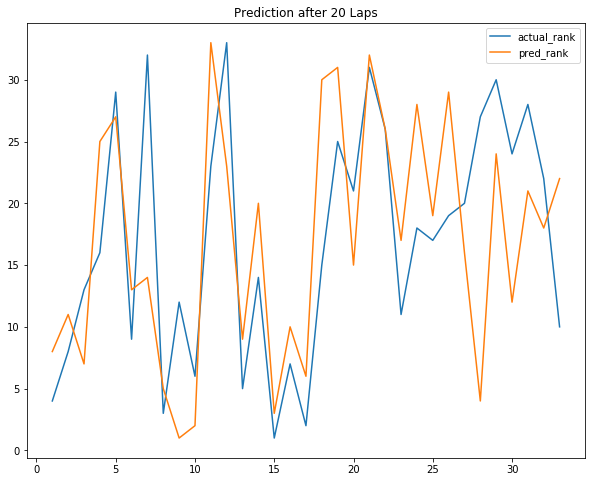

In [0]:
pred=list(map(int,ss.rankdata(pred_lap_time)))
df_new=df[df['completed_laps']==21]
df_new=df_new.sort_values(by='car_number', ascending=True)
actual=df_new['overall_rank'].values.tolist()
fig = plt.figure(figsize=(10, 8))
plt.plot(list(range(1,len(actual)+1)),actual,label='actual_rank')
plt.plot(list(range(1,len(actual)+1)),pred,label="pred_rank")

plt.title('Prediction after 20 Laps')

plt.legend()


Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=398.506, BIC=406.074, Time=0.136 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=431.240, BIC=435.024, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=419.795, BIC=425.471, Time=0.030 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=397.220, BIC=402.895, Time=0.108 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=429.261, BIC=431.153, Time=0.008 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=397.052, BIC=406.511, Time=0.255 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=400.804, BIC=410.263, Time=0.253 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=397.993, BIC=405.560, Time=0.172 seconds
Near non-invertible roots for order (0, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=404.421, BIC=411.988, Time=0.078 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=398.916, BIC=410.267, Time=0.114 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Total fit time: 1.187 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=332.900, BIC=340.385, Time=0.170 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=341.898, BIC=345.641, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=339.960, BIC=345.574, Time=0.041 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=333.874, BIC=339.488, Time=0.037 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=340.057, BIC=341.928, Time=0.009 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=333.938, BIC=343.294, Time=0.071 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=418.205, BIC=424.001, Time=0.046 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=446.800, BIC=452.596, Time=0.094 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=495.467, BIC=497.399, Time=0.007 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=406.357, BIC=416.016, Time=0.192 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=407.183, BIC=416.842, Time=0.213 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=430.507, BIC=438.235, Time=0.114 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=413.925, BIC=421.652, Time=0.068 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=408.335, BIC=419.926, Time=0.196 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Total fit time: 1.020 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=325.500, BIC=332.984, Time=0.162 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=333.874, BIC=337.616, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=331.385, BIC=336.999, Time=0.051 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=325.972, BIC=331.586, Time=0.035 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=332.107, BIC=333.978, Time=0.009 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=327.343, BIC=336.699, Time=0.075 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=327.365, BIC=336.721, Time=0.077 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=327.533, BIC=338.760, Time=0.393 seconds
Near non-invertible roots for order (1, 2, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Total fit time: 0.978 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=431.621, BIC=439.270, Time=0.071 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=455.138, BIC=458.963, Time=0.009 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=439.962, BIC=445.698, Time=0.039 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=431.178, BIC=436.914, Time=0.051 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=453.301, BIC=455.213, Time=0.024 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=423.597, BIC=431.245, Time=0.075 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=423.597, BIC=433.157, Time=0.121 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=419.924, BIC=433.309, Time=0.230 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=419.211, BIC=430.683, Time=0.168 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=417.828, BIC=427.389, Time=0.118 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=416.606, BIC=424.254, Time=0.074 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=417.770, BIC=427.330, Time=0.115 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=419.765, BIC=431.237, Time=0.191 seconds
Total fit time: 1.721 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=329.019, BIC=336.504, Time=0.131 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=337.724, BIC=341.466, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=334.665, BIC=340.279, Time=0.030 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=329.403, BIC=335.017, Time=0.043 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=335.862, BIC=337.733, Time=0.008 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=331.243, BIC=340.599, Time=0.093 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=331.158, BIC=340.514, Time=0.114 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=329.171, BIC=336.656, Time=0.068 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=331.202

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=332.642, BIC=343.870, Time=0.290 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 0.854 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=404.785, BIC=412.433, Time=0.153 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=453.728, BIC=457.552, Time=0.010 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=420.266, BIC=426.002, Time=0.041 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=410.110, BIC=415.846, Time=0.091 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=451.771, BIC=453.683, Time=0.008 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=406.581, BIC=416.141, Time=0.238 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=406.640, BIC=416.200, Time=0.212 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=406.152, BIC=413.800, Time=0.167 seconds
Near non-invertible roots for order (0, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=412.764, BIC=420.412, Time=0.076 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=408.662, BIC=420.134, Time=0.298 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.310 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=341.757, BIC=349.242, Time=0.149 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=353.704, BIC=357.447, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=349.294, BIC=354.907, Time=0.051 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=342.122, BIC=347.736, Time=0.042 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=351.801, BIC=353.673, Time=0.010 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=343.407, BIC=352.763, Time=0.093 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=342.788, BIC=352.144, Time=0.188 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=339.230, BIC=348.586, Time=0.278 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.508 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=393.700, BIC=401.267, Time=0.077 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=467.493, BIC=471.277, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=422.044, BIC=427.719, Time=0.032 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=415.408, BIC=421.084, Time=0.123 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=465.499, BIC=467.390, Time=0.009 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=386.961, BIC=398.312, Time=0.389 seconds
Near non-invertible roots for order (1, 2, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=386.488, BIC=395.947, Time=0.110 seconds
Fit ARIMA: (0, 2, 4)x(0, 0, 0, 0) (constant=True); AIC=388.062, BIC=399.413, Time=0.217 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 2, 4)x(0, 0, 0, 0) (constant=True); AIC=390.421, BIC=403.664, Time=0.416 seconds
Total fit time: 1.985 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=328.508, BIC=335.993, Time=0.134 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=337.869, BIC=341.612, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=335.210, BIC=340.824, Time=0.050 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=329.238, BIC=334.852, Time=0.036 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=336.045, BIC=337.917, Time=0.009 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=330.329, BIC=339.685, Time=0.090 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=329.938, BIC=339.294, Time=0.271 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=445.193, BIC=453.148, Time=0.177 seconds
Near non-invertible roots for order (0, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=455.263, BIC=463.219, Time=0.049 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=445.869, BIC=457.802, Time=0.321 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.262 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=334.188, BIC=341.672, Time=0.166 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=343.330, BIC=347.072, Time=0.012 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=341.267, BIC=346.880, Time=0.035 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=335.460, BIC=341.074, Time=0.038 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=341.444, BIC=343.316, Time=0.009 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=335.346, BIC=344.702, Time=0.084 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=334.812, BIC=344.168, Time=0.192 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=336.792, BIC=348.020, Time=0.277 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.994 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=392.570, BIC=400.137, Time=0.206 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=439.741, BIC=443.525, Time=0.008 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=414.927, BIC=420.602, Time=0.040 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=397.398, BIC=403.073, Time=0.095 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=437.788, BIC=439.679, Time=0.008 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=393.497, BIC=402.956, Time=0.257 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=393.665, BIC=403.124, Time=0.100 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=391.661, BIC=399.228, Time=0.062 seconds
Fit ARIMA: (0, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=393.661, BIC=403.120, Time=0.116 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=395.429, BIC=406.780, Time=0.319 seconds
Near non-invertible roots for order (1, 2, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 1.227 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=398.208, BIC=405.775, Time=0.124 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=429.526, BIC=433.309, Time=0.008 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=417.361, BIC=423.036, Time=0.029 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=398.136, BIC=403.812, Time=0.095 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=427.696, BIC=429.588, Time=0.008 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) 

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=400.094, BIC=411.445, Time=0.426 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=402.054, BIC=411.513, Time=0.173 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (3, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=402.049, BIC=411.508, Time=0.097 seconds
Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=402.003, BIC=415.245, Time=0.147 seconds
Total fit time: 1.380 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=350.657, BIC=358.142, Time=0.066 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=358.838, BIC=362.580, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=431.589, BIC=441.249, Time=0.213 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=431.887, BIC=441.546, Time=0.247 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=430.528, BIC=438.255, Time=0.252 seconds
Near non-invertible roots for order (0, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=436.756, BIC=444.484, Time=0.051 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=431.913, BIC=443.503, Time=0.295 seconds
Near non-invertible roots for order (2, 2, 2)(

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=347.895, BIC=357.251, Time=0.277 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.503 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=329.627, BIC=337.112, Time=0.053 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=332.754, BIC=336.496, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=330.083, BIC=335.696, Time=0.042 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=327.778, BIC=333.391, Time=0.033 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=331.376, BIC=333.247, Time=0.009 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=329.550, BIC=337.035, Time=0.070 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=331.105, BIC=340.461, Time=0.069 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=345.893, BIC=355.249, Time=0.282 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.502 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=565.272, BIC=573.969, Time=0.058 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=680.390, BIC=684.739, Time=0.009 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=563.432, BIC=569.955, Time=0.023 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=614.628, BIC=621.151, Time=0.139 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=678.408, BIC=680.583, Time=0.008 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=560.503, BIC=571.375, Time=0.245 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.562 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=437.367, BIC=445.094, Time=0.066 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=478.189, BIC=482.053, Time=0.009 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=447.911, BIC=453.706, Time=0.033 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=442.400, BIC=448.196, Time=0.099 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=476.317, BIC=478.249, Time=0.008 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=438.982, BIC=448.641, Time=0.205 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=439.238, BIC=448.897, Time=0.089 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=438.181, BIC=445.908, Time=0.059 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=444.102, BIC=451.829, Time=0.069 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=441.221, BIC=452.812, Time=0.166 seconds
Total fit t

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=423.196, BIC=432.757, Time=0.123 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=419.629, BIC=431.101, Time=0.237 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=418.297, BIC=427.858, Time=0.098 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=416.957, BIC=424.606, Time=0.078 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=418.224, BIC=427.785, Time=0.122 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=420.224, BIC=431.696, Time=0.169 seconds
Total fit time: 1.107 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=561.129, BIC=569.637, Time=0.173 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=703.448, BIC=707.702, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=584.225, BIC=590.606, Time=0.030 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=629.197, BIC=635.578, Time=0.060 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=701.448, BIC=703.575, Time=0.008 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarn

Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=563.104, BIC=573.739, Time=0.298 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=561.640, BIC=572.275, Time=0.174 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=577.389, BIC=585.898, Time=0.261 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=583.215, BIC=591.724, Time=0.081 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=559.176, BIC=571.938, Time=0.224 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=553.574, BIC=568.464, Time=0.258 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=552.121, BIC=564.884, Time=0.154 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (3, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=557.696, BIC=568.332, Time=0.181 seconds
Fit ARIMA: (4, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=554.035, BIC=568.925, Time=0.239 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (4, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=557.170, BIC=569.933, Time=0.251 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA: (4, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=554.939, BIC=571.956, Time=0.436 seconds
Total fit time: 2.860 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=437.645, BIC=445.372, Time=0.061 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=482.012, BIC=485.876, Time=0.009 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=450.693, BIC=456.489, Time=0.032 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=444.904, BIC=450.699, Time=0.092 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=480.133, BIC=482.064, Time=0.008 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=439.230, BIC=448.889, Time=0.093 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=439.079, BIC=448.738, Time=0.130 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=437.178, BIC=444.905, Time=0.077 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=439.069, BIC=448.728, Time=0.106 seconds
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=440.236, BIC=451.827, Time=0.225 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit t

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=431.310, BIC=440.969, Time=0.222 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=431.665, BIC=441.324, Time=0.235 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=433.546, BIC=441.273, Time=0.157 seconds
Near non-invertible roots for order (0, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=433.389, BIC=441.117, Time=0.081 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=432.274, BIC=443.865, Time=0.249 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.260 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=328.821, BIC=336.306, Time=0.154 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=338.565, BIC=342.308, Time=0.009 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=334.586, BIC=340.199, Time=0.050 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=328.477, BIC=334.090, Time=0.034 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=336.792, BIC=338.664, Time=0.008 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=328.989, BIC=336.474, Time=0.055 seconds


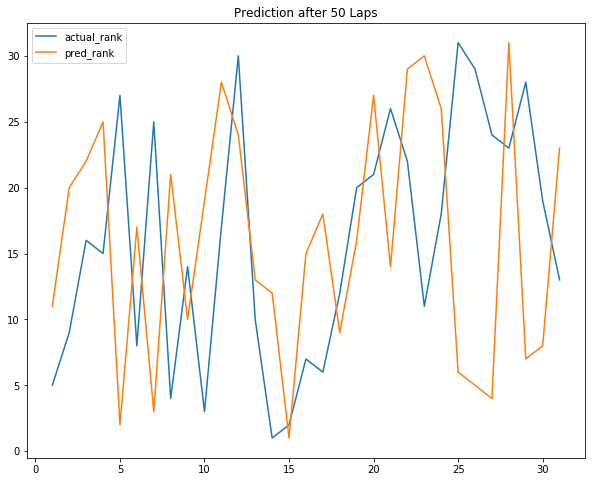

In [0]:





pred_lap_time=[]
for item in carnumber:
  df_fil=df[df['car_number']==item]
  #laptime filter
  df_fil1=df_fil[df_fil['completed_laps']<=50]
  df_temp=df_fil[df_fil['completed_laps']==51]
  if len(df_temp["laptime"].values)>0:

    automodel = arimamodel(df_fil1["laptime"])
    x=plotarima(1, df_fil1["laptime"], automodel)
    pred_lap_time.append(x)

pred_lap_time = list(map(float,pred_lap_time))

pred=list(map(int,ss.rankdata(pred_lap_time)))
df_new=df[df['completed_laps']==51]
df_new=df_new.sort_values(by='car_number', ascending=True)
actual=df_new['overall_rank'].values.tolist()
fig = plt.figure(figsize=(10, 8))
plt.plot(list(range(1,len(actual)+1)),actual,label='actual_rank')
plt.plot(list(range(1,len(actual)+1)),pred,label="pred_rank")

plt.title('Prediction after 50 Laps')

plt.legend()


Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=814.228, BIC=824.649, Time=0.083 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=816.517, BIC=821.728, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=813.249, BIC=821.064, Time=0.047 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=812.309, BIC=820.124, Time=0.069 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=814.517, BIC=817.123, Time=0.011 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=814.182, BIC=824.602, Time=0.092 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=804.857, BIC=817.882, Time=0.350 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.676 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=765.408, BIC=775.789, Time=0.094 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=780.704, BIC=785.895, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=766.042, BIC=773.827, Time=0.056 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=763.725, BIC=771.510, Time=0.071 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=778.705, BIC=781.300, Time=0.009 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=765.349, BIC=775.729, Time=0.065 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=764.140, BIC=777.116, Time=0.202 seconds
Total fit time: 0.519 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=752.172, BIC=762.552, Time=0.090 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=770.348, BIC=775.538, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=753.764, BIC=761.549, Time=0.052 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=750.210, BIC=757.995, Time=0.055 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=768.351, BIC=770.946, Time=0.009 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=752.177, BIC=762.558, Time=0.089 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=744.388, BIC=757.364, Time=0.287 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.603 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=770.468, BIC=780.849, Time=0.092 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=777.703, BIC=782.893, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=768.580, BIC=776.365, Time=0.059 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=769.618, BIC=777.403, Time=0.072 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=775.705, BIC=778.300, Time=0.009 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=770.319, BIC=780.700, Time=0.086 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=757.241, BIC=770.216, Time=0.185 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=753.117, BIC=768.688, Time=0.169 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=766.728, BIC=779.704, Time=0.116 seconds
Fit ARIMA: (4, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=753.152, BIC=771.318, Time=0.199 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=752.387, BIC=770.553, Time=0.350 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=750.595, BIC=766.166, Time=0.187 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=771.474, BIC=784.449, Time=0.161 seconds
Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=752.333, BIC=770.498, Time=0.299 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=761.570, BIC=777.140, Time=0.364 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=753.932, BIC=774.693, Time=0.411 seconds
Total fit time: 2.792 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=807.145, BIC=817.525, Time=0.095 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=818.112, BIC=823.303, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=817.121, BIC=824.906, Time=0.064 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=812.306, BIC=820.092, Time=0.082 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=816.115, BIC=818.710, Time=0.010 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=798.806, BIC=811.781, Time=0.176 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=806.487, BIC=816.867, Time=0.108 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=807.253, BIC=822.824, Time=0.164 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=795.185, BIC=810.756, Time=0.203 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=793.607, BIC=806.582, Time=0.172 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=798.202, BIC=808.583, Time=0.075 seconds
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=795.437, BIC=811.008, Time=0.159 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=795.643, BIC=808.618, Time=0.116 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=796.742, BIC=814.907, Time=0.277 seconds
Total fit time: 1.730 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=752.334, BIC=762.714, Time=0.096 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=770.765, BIC=775.955, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=753.012, BIC=760.797, Time=0.051 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=751.266, BIC=759.051, Time=0.069 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=768.766, BIC=771.361, Time=0.009 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=752.112, BIC=762.492, Time=0.088 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=751.356, BIC=764.332, Time=0.246 seconds
Total fit time: 0.579 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=882.453, BIC=893.182, Time=0.073 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=881.472, BIC=886.836, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=880.454, BIC=888.500, Time=0.044 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=880.607, BIC=888.654, Time=0.056 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=879.472, BIC=882.154, Time=0.010 seconds
Total fit time: 0.207 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=849.220, BIC=859.798, Time=0.082 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=855.573, BIC=860.862, Time=0.016 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=849.385, BIC=857.319, Time=0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=839.990, BIC=853.212, Time=0.320 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.694 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=771.292, BIC=781.672, Time=0.093 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=777.387, BIC=782.577, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=769.341, BIC=777.126, Time=0.062 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=770.411, BIC=778.196, Time=0.072 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=775.391, BIC=777.986, Time=0.009 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=771.222, BIC=781.602, Time=0.087 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=758.741, BIC=771.716, Time=0.216 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=754.078, BIC=769.649, Time=0.178 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=767.616, BIC=780.592, Time=0.120 seconds
Fit ARIMA: (4, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=754.184, BIC=772.350, Time=0.196 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=753.796, BIC=771.962, Time=0.281 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=752.321, BIC=767.892, Time=0.372 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=772.168, BIC=785.144, Time=0.157 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=753.655, BIC=771.821, Time=0.291 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=762.364, BIC=777.934, Time=0.391 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=756.218, BIC=776.979, Time=0.503 seconds
Total fit time: 3.062 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=812.801, BIC=823.181, Time=0.107 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=813.320, BIC=818.511, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=814.041, BIC=821.827, Time=0.057 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=813.060, BIC=820.845, Time=0.075 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=811.323, BIC=813.918, Time=0.010 seconds
Total fit time: 0.267 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=827.941, BIC=838.557, Time=0.095 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=842.021, BIC=847.329, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=830.112, BIC=838.074, Time=0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=819.624, BIC=832.894, Time=0.268 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.599 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=792.067, BIC=802.566, Time=0.097 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=929.708, BIC=934.958, Time=0.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=822.605, BIC=830.480, Time=0.066 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=837.459, BIC=845.334, Time=0.052 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1113.367, BIC=1115.992, Time=0.007 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=792.180, BIC=805.305, Time=0.158 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=792.446, BIC=805.571, Time=0.122 second

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=792.011, BIC=807.761, Time=0.253 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=793.530, BIC=811.904, Time=0.390 seconds
Fit ARIMA: (2, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=786.980, BIC=805.355, Time=0.264 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=794.427, BIC=810.177, Time=0.170 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (3, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=781.238, BIC=802.238, Time=0.485 seconds
Near non-invertible roots for order (3, 0, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 4)x(0, 0, 0, 0) (constant=True); AIC=779.486, BIC=800.486, Time=0.513 seconds
Near non-invertible roots for order (2, 0, 4)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: (1, 0, 4)x(0, 0, 0, 0) (constant=True); AIC=789.947, BIC=808.321, Time=0.335 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (3, 0, 4)x(0, 0, 0, 0) (constant=True); AIC=781.953, BIC=805.578, Time=0.549 seconds
Near non-invertible roots for order (3, 0, 4)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 3.630 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=985.294, BIC=996.096, Time=0.153 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=999.318, BIC=1004.719, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=996.265, BIC=1004.367, Time=0.070 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=994.812, BIC=1002.914, Time=0.053 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=997.318, BIC=1000.019, Time=0.010 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=987.293, BIC=1000.795, Time=0.174 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=987.293, BIC=1000.795, Time=0.129 se

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=990.765, BIC=1001.567, Time=0.086 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=996.834, BIC=1007.636, Time=0.065 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=988.651, BIC=1004.854, Time=0.414 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 1.179 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=858.819, BIC=869.434, Time=0.077 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=858.178, BIC=863.486, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=856.819, BIC=864.781, Time=0.044 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=857.026, BIC=864.988, Time=0.056 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=856.178, BIC=858.832, Time=0.010 seconds
Total fit time: 0.207 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=772.585, BIC=782.965, Time=0.058 seconds
Fit ARIMA: (0, 1, 0)x(

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=767.401, BIC=780.377, Time=0.213 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=757.239, BIC=772.810, Time=0.269 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=758.717, BIC=771.693, Time=0.110 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=760.541, BIC=778.706, Time=0.222 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=759.019, BIC=777.184, Time=0.238 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=764.006, BIC=779.577, Time=0.330 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=759.669, BIC=775.239, Time=0.172 seconds
Fit ARIMA: (3, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=761.017, BIC=781.778, Time=0.448 seconds
Total fit time: 2.287 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=753.272, BIC=763.653, Time=0.096 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=770.845, BIC=776.036, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=754.145, BIC=761.930, Time=0.054 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=751.596, BIC=759.381, Time=0.066 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=768.848, BIC=771.443, Time=0.009 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=755.263, BIC=768.239, Time=0.145 seconds
Total fit time: 0.477 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=764.497, BIC=774.878, Time=0.081 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=774.052, BIC=779.242, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=763.300, BIC=771.085, Time=0.058 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=763.098, BIC=770.883, Time=0.072 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=772.056, BIC=774.652, Time=0.009 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=764.209, BIC=774.590, Time=0.085 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=765.503, BIC=778.479, Time=0.167 seconds
Total fit time: 0.492 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=779.392, BIC=789.772, Time=0.117 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=781.475, BIC=786.665, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=777.399, BIC=785.185, Time=0.064 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=778.257, BIC=786.043, Time=0.077 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=779.478, BIC=782.073, Time=0.009 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=779.377, BIC=789.757, Time=0.090 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=780.534, BIC=793.510, Time=0.136 seconds
Total fit time: 0.515 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=811.630, BIC=822.011, Time=0.114 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=814.529, BIC=819.719, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=813.043, BIC=820.829, Time=0.069 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=810.509, BIC=818.295, Time=0.068 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=812.531, BIC=815.126, Time=0.010 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=808.060, BIC=818.441, Time=0.067 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=798.433, BIC=811.408, Time=0.134 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=798.311, BIC=813.882, Time=0.148 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=796.375, BIC=809.351, Time=0.109 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=806.420, BIC=816.800, Time=0.096 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=798.326, BIC=813.896, Time=0.185 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=805.695, BIC=818.671, Time=0.111 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=799.991, BIC=818.157, Time=0.320 seconds
Total fit time: 1.456 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=768.044, BIC=778.424, Time=0.076 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=776.402, BIC=781.592, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=766.747, BIC=774.532, Time=0.057 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=766.446, BIC=774.231, Time=0.077 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=774.407, BIC=777.002, Time=0.010 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=767.905, BIC=778.285, Time=0.089 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=769.526, BIC=782.502, Time=0.249 seconds
Total fit time: 0.581 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=763.989, BIC=774.370, Time=0.077 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=777.244, BIC=782.434, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=763.968, BIC=771.753, Time=0.057 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=762.453, BIC=770.239, Time=0.077 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=775.244, BIC=777.839, Time=0.009 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=763.795, BIC=774.176, Time=0.089 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=765.061, BIC=778.037, Time=0.158 seconds
Total fit time: 0.489 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=776.059, BIC=786.439, Time=0.089 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=780.690, BIC=785.880, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=774.071, BIC=781.856, Time=0.063 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=775.093, BIC=782.878, Time=0.068 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=778.692, BIC=781.287, Time=0.009 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=776.039, BIC=786.419, Time=0.093 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=777.766, BIC=790.742, Time=0.163 seconds
Total fit time: 0.507 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=826.556, BIC=836.936, Time=0.102 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=826.340, BIC=831.530, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=827.111, BIC=834.896, Time=0.053 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=826.162, BIC=833.948, Time=0.069 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=824.342, BIC=826.937, Time=0.009 seconds
Total fit time: 0.251 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=785.467, BIC=795.848, Time=0.086 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=799.875, BIC=805.065, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=795.242, BIC=803.028, Time=0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=772.340, BIC=787.910, Time=0.146 seconds
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=772.184, BIC=787.755, Time=0.137 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=770.844, BIC=783.819, Time=0.088 seconds
Fit ARIMA: (0, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=772.427, BIC=787.998, Time=0.127 seconds
Fit ARIMA: (1, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=774.112, BIC=792.278, Time=0.278 seconds
Total fit time: 1.192 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=785.375, BIC=795.755, Time=0.095 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=804.540, BIC=809.730, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=799.815, BIC=807.600, Time=0.056 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=788.630, BIC=796.416, Time=0.069 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=802.544, BIC=805.139, Time=0.017 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=780.783, BIC=793.759, Time=0.144 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=785.863

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=773.477, BIC=786.452, Time=0.094 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=781.344, BIC=791.725, Time=0.061 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=775.035, BIC=790.606, Time=0.162 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=776.174, BIC=789.150, Time=0.133 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=775.604, BIC=793.770, Time=0.443 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 1.932 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=956.387, BIC=967.332, Time=0.121 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=960.620, BIC=966.092, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=959.917, BIC=968.126, Time=0.080 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=957.577, BIC=965.786, Time=0.076 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=958.622, BIC=961.358, Time=0.011 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=945.620, BIC=959.301, Time=0.134 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=952.766, BIC=963.711, Time=0.109 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=793.674, BIC=809.245, Time=0.187 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=792.394, BIC=805.369, Time=0.144 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=802.600, BIC=815.575, Time=0.112 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=794.352, BIC=812.518, Time=0.264 seconds
Total fit time: 1.340 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=829.629, BIC=840.049, Time=0.131 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=826.942, BIC=832.152, Time=0.011 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=828.514, BIC=836.329, Time=0.075 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=828.588, BIC=836.403, Time=0.062 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=824.944, BIC=827.549, Time=0.009 seconds
Total fit time: 0.297 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=757.549, BIC=767.929, Time=0.105 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=775.049, BIC=780.240, Time=0.015 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=758.961, BIC=766.746, Time=0.059 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=755.680, BIC=763.465, Time=0.050 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=773.050, BIC=775.645, Time=0.010 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=757.551, BIC=767.931, Time=0.095 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=759.54

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


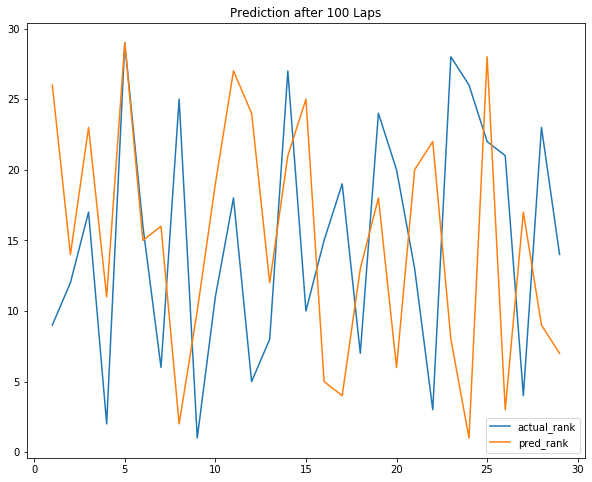

In [0]:

pred_lap_time=[]
for item in carnumber:
  df_fil=df[df['car_number']==item]
  #laptime filter
  df_fil1=df_fil[df_fil['completed_laps']<=100]
  df_temp=df_fil[df_fil['completed_laps']==101]
  if len(df_temp["laptime"].values)>0:

    automodel = arimamodel(df_fil1["laptime"])
    x=plotarima(1, df_fil1["laptime"], automodel)
    pred_lap_time.append(x)

pred_lap_time = list(map(float,pred_lap_time))

pred=list(map(int,ss.rankdata(pred_lap_time)))
df_new=df[df['completed_laps']==101]
df_new=df_new.sort_values(by='car_number', ascending=True)
actual=df_new['overall_rank'].values.tolist()
fig = plt.figure(figsize=(10, 8))
plt.plot(list(range(1,len(actual)+1)),actual,label='actual_rank')
plt.plot(list(range(1,len(actual)+1)),pred,label="pred_rank")

plt.title('Prediction after 100 Laps')

plt.legend()


In [0]:
pred_lap_time = list(map(float,pred_lap_time))

pred=list(map(int,ss.rankdata(pred_lap_time)))
df_new=df[df['completed_laps']==101]
df_new=df_new.sort_values(by='car_number', ascending=True)
actual=df_new['overall_rank'].values.tolist()
print(len(pred_lap_time))

29


Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1265.047, BIC=1277.247, Time=0.152 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1269.210, BIC=1275.309, Time=0.014 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1266.507, BIC=1275.657, Time=0.054 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1264.793, BIC=1273.942, Time=0.089 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1267.276, BIC=1270.326, Time=0.012 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1264.119, BIC=1276.319, Time=0.126 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1252.601, BIC=1267.850, Time=0.367 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1263.148, BIC=1278.397, Time=0.161 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1254.594, BIC=1272.893, Time=0.533 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1257.951, BIC=1276.250, Time=0.200 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1255.012, BIC=1276.361, Time=0.662 seconds
Near non-invertible roots for order (1, 1, 4)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 5)x(0, 0, 0, 0) (constant=True); AIC=1254.198, BIC=1275.547, Time=0.339 seconds
Fit ARIMA: (1, 1, 5)x(0, 0, 0, 0) (constant=True); AIC=1256.174, BIC=1280.573, Time=0.428 seconds
Total fit time: 3.158 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1131.591, BIC=1143.607, Time=0.139 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1147.901, BIC=1153.909, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1132.917, BIC=1141.929, Time=0.073 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1129.612, BIC=1138.624, Time=0.051 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1145.983, BIC=1148.987, Tim

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1119.341, BIC=1134.361, Time=0.423 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.832 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1150.550, BIC=1162.566, Time=0.069 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1156.978, BIC=1162.986, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1149.494, BIC=1158.505, Time=0.073 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1148.565, BIC=1157.577, Time=0.058 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1155.062, BIC=1158.066, Time=0.010 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1150.539, BIC=1162.555, Time=0.114 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax

Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1138.952, BIC=1153.971, Time=0.409 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 0.758 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1274.281, BIC=1286.296, Time=0.297 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1295.293, BIC=1301.301, Time=0.017 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1296.326, BIC=1305.338, Time=0.049 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1295.703, BIC=1304.715, Time=0.077 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1293.312, BIC=1296.316, Time=0.011 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1273.543, BIC=1288.563, Time=0.216 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1293.905, BIC=1305.921, Time=0.093 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1274.341, BIC=1292.364, Time=0.253 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1273.819, BIC=1291.843, Time=0.287 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1274.491, BIC=1289.510, Time=0.173 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1288.727, BIC=1303.746, Time=0.110 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1276.384, BIC=1297.412, Time=0.479 seconds
Total fit time: 2.078 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1135.906, BIC=1147.922, Time=0.079 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1149.638, BIC=1155.646, Time=0.021 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1135.232, BIC=1144.244, Time=0.070 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1134.413, BIC=1143.425, Time=0.089 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1147.728, BIC=1150.732, Time=0.011 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1135.581, BIC=1147.597, Time=0.116 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1129.932, BIC=1144.952, Time=0.299 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1112.510, BIC=1130.533, Time=0.293 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1116.679, BIC=1131.699, Time=0.257 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1115.602, BIC=1136.630, Time=0.309 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1114.208, BIC=1135.235, Time=0.431 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1122.980, BIC=1141.003, Time=0.532 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1115.632, BIC=1133.656, Time=0.214 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1114.512, BIC=1138.544, Time=0.447 seconds
Total fit time: 3.188 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1302.733, BIC=1315.008, Time=0.109 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1299.869, BIC=1306.006, Time=0.015 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1301.039, BIC=1310.246, Time=0.049 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1300.923, BIC=1310.130, Time=0.061 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1297.935, BIC=1301.004, Time=0.011 seconds
Total fit time: 0.254 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1284.530, BIC=1296.704, Time=0.108 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1286.118, BIC=1292.205, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1285.132, BIC=

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1268.038, BIC=1283.255, Time=0.192 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1266.642, BIC=1284.903, Time=0.311 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1266.464, BIC=1281.681, Time=0.141 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1281.218, BIC=1293.392, Time=0.089 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1268.353, BIC=1286.614, Time=0.266 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1281.877, BIC=1297.094, Time=0.110 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1269.757, BIC=1291.061, Time=0.422 seconds
Total fit time: 1.890 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1350.748, BIC=1363.220, Time=0.169 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1351.761, BIC=1357.997, Time=0.021 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1350.425, BIC=1359.779, Time=0.069 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1350.155, BIC=1359.509, Time=0.056 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1349.807, BIC=1352.925, Time=0.011 seconds
Total fit time: 0.336 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1214.650, BIC=1226.665, Time=0.123 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1211.060, BIC=1217.068, Time=0.014 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1212.918, BIC=1221.930, Time=0.059 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1212.872, BIC=1221.884, Time=0.095 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1209.099, BIC=1212.103, Time=0.012 seconds
Total fit time: 0.312 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1254.251, BIC=1266.476, Time=0.123 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1274.958, BIC=1281.070, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1262.965, BIC=1272.134, Time=0.083 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1254.709, BIC=1263.878, Time=0.064 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1238.383, BIC=1253.664, Time=0.373 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1253.812, BIC=1266.037, Time=0.108 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1251.916, BIC=1267.198, Time=0.163 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1240.382, BIC=1258.720, Time=0.495 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1244.495, BIC=1262.832, Time=0.213 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1241.217, BIC=1262.611, Time=0.326 seconds
Fit ARIMA: (2, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1229.909, BIC=1254.359, Time=0.393 seconds
Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1237.305, BIC=1258.699, Time=0.303 seconds
Fit ARIMA: (3, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1231.476, BIC=1258.982, Time=0.475 seconds
Fit ARIMA: (2, 1, 5)x(0, 0, 0, 0) (constant=True); AIC=1234.414, BIC=1261.920, Time=0.589 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 5)x(0, 0, 0, 0) (constant=True); AIC=1239.254, BIC=1263.704, Time=0.781 seconds
Near non-invertible roots for order (1, 1, 5)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (3, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1235.941, BIC=1260.391, Time=0.303 seconds
Fit ARIMA: (3, 1, 5)x(0, 0, 0, 0) (constant=True); AIC=1232.162, BIC=1262.725, Time=0.781 seconds
Total fit time: 5.743 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1391.397, BIC=1403.698, Time=0.131 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1410.041, BIC=1416.191, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1406.413, BIC=1415.638, Time=0.070 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1404.816, BIC=1414.041, Time=0.084 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1408.076, BIC=1411.151, Tim

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1399.704, BIC=1412.005, Time=0.111 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1406.472, BIC=1418.773, Time=0.073 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1394.189, BIC=1412.640, Time=0.478 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Total fit time: 1.335 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1283.561, BIC=1295.786, Time=0.107 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1283.523, BIC=1289.636, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1282.484, BIC=1291.652, Time=0.054 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1281.826, BIC=1290.994, Time=0.066 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1281.584, BIC=1284.640, Time=0.011 seconds
Total fit time: 0.260 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1163.392, BIC=1175.408, Time=0.084 seconds
Fit ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1154.465, BIC=1169.484, Time=0.335 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1142.788, BIC=1160.811, Time=0.335 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1147.773, BIC=1162.792, Time=0.317 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1144.308, BIC=1165.336, Time=0.280 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1140.952, BIC=1161.980, Time=0.588 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1150.927, BIC=1168.951, Time=0.265 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1146.275, BIC=1164.298, Time=0.243 seconds
Fit ARIMA: (3, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1144.708, BIC=1168.739, Time=0.407 seconds
Total fit time: 3.125 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1140.442, BIC=1152.458, Time=0.083 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1152.131, BIC=1158.139, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1139.193, BIC=1148.205, Time=0.072 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1138.702, BIC=1147.714, Time

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1146.108, BIC=1161.128, Time=0.306 seconds
Total fit time: 0.656 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1263.201, BIC=1275.217, Time=0.178 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1278.338, BIC=1284.346, Time=0.022 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1272.871, BIC=1281.883, Time=0.062 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1272.733, BIC=1281.745, Time=0.083 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1276.371, BIC=1279.375, Time=0.012 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax

Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1263.762, BIC=1278.782, Time=0.490 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1264.069, BIC=1279.089, Time=0.483 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1274.551, BIC=1286.567, Time=0.097 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1274.834, BIC=1286.850, Time=0.128 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1265.970, BIC=1283.994, Time=0.304 seconds
Total fit time: 1.872 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1211.835, BIC=1223.850, Time=0.151 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1212.391, BIC=1218.399, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1212.415, BIC=1221.427, Time=0.079 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1211.129, BIC=1220.141, Time=0.066 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1210.499, BIC=1213.503, Time=0.010 seconds
Total fit time: 0.328 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1152.813, BIC=1164.829, Time=0.076 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1160.129, BIC=1166.137, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1151.772, BIC=

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1153.190, BIC=1168.209, Time=0.288 seconds
Total fit time: 0.646 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1210.678, BIC=1222.773, Time=0.091 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1214.640, BIC=1220.688, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1209.339, BIC=1218.411, Time=0.085 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1208.741, BIC=1217.813, Time=0.061 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1212.711, BIC=1215.735, Time=0.010 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1210.529, BIC=1222.624, Time=0.119 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1209.409, BIC=1224.528, Time=0.253 seconds
Total fit time: 0.641 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1364.822, BIC=1377.147, Time=0.392 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1376.070, BIC=1382.232, Time=0.241 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1377.862, BIC=1387.107, Time=0.038 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1377.839, BIC=1387.083, Time=0.074 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1374.100, BIC=1377.181, Time=0.011 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax

Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1365.656, BIC=1381.063, Time=0.427 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1365.844, BIC=1381.251, Time=0.444 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1378.895, BIC=1391.221, Time=0.119 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1379.472, BIC=1391.797, Time=0.119 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1367.960, BIC=1386.448, Time=0.489 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 2.372 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1175.743, BIC=1187.759, Time=0.121 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1182.976, BIC=1188.984, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1179.198, BIC=1188.210, Time=0.083 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1175.004, BIC=1184.016, Time=0.078 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1181.042, BIC=1184.046, Time=0.010 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1173.086, BIC=1185.102, Time=0.107 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1159.975, BIC=1174.995, Time=0.396 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1158.801, BIC=1173.821, Time=0.135 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1159.509, BIC=1177.533, Time=0.205 seconds
Fit ARIMA: (0, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1160.326, BIC=1178.349, Time=0.219 seconds
Fit ARIMA: (1, 1, 4)x(0, 0, 0, 0) (constant=True); AIC=1161.428, BIC=1182.456, Time=0.355 seconds
Total fit time: 1.736 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1168.416, BIC=1180.432, Time=0.105 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1185.387, BIC=1191.395, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1180.024, BIC=1189.036, Time=0.087 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1171.287, BIC=1180.299, Time=0.070 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1183.444, BIC=1186.448, Time=0.010 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1155.639, BIC=1170.659, Time=0.175 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1151.035, BIC=1166.055, Time=0.156 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1163.184, BIC=1175.200, Time=0.094 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1152.972, BIC=1170.996, Time=0.163 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1154.498, BIC=1169.517, Time=0.131 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1153.636, BIC=1174.664, Time=0.453 seconds
Total fit time: 2.027 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1341.246, BIC=1353.646, Time=0.136 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1347.791, BIC=1353.991, Time=0.014 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1346.054, BIC=1355.354, Time=0.086 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1343.115, BIC=1352.415, Time=0.080 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1345.830, BIC=1348.930, Time=0.010 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1326.118, BIC=1341.617, Time=0.150 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1336.472, BIC=1348.871, Time=0.122 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1327.916, BIC=1346.515, Time=0.207 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1170.504, BIC=1185.524, Time=0.327 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1182.029, BIC=1197.049, Time=0.140 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1170.160, BIC=1191.187, Time=0.230 seconds
Total fit time: 1.664 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1223.991, BIC=1236.034, Time=0.148 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1222.813, BIC=1228.835, Time=0.012 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1222.639, BIC=1231.671, Time=0.082 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1222.904, BIC=1231.935, Time=0.062 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1220.864, BIC=1223.874, Tim

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1146.795, BIC=1161.814, Time=0.290 seconds
Total fit time: 0.701 seconds


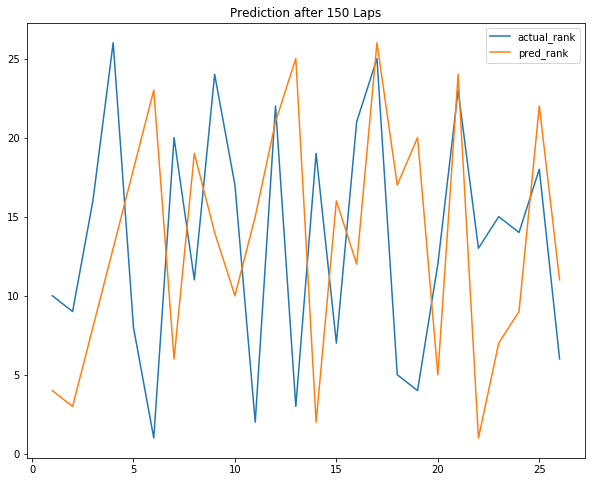

In [0]:
pred_lap_time=[]
for item in carnumber:
  df_fil=df[df['car_number']==item]
  #laptime filter
  df_fil1=df_fil[df_fil['completed_laps']<=150]
  df_temp=df_fil[df_fil['completed_laps']==151]
  if len(df_temp["laptime"].values)>0:

    automodel = arimamodel(df_fil1["laptime"])
    x=plotarima(1, df_fil1["laptime"], automodel)
    pred_lap_time.append(x)

pred_lap_time = list(map(float,pred_lap_time))

pred=list(map(int,ss.rankdata(pred_lap_time)))
df_new=df[df['completed_laps']==151]
df_new=df_new.sort_values(by='car_number', ascending=True)
actual=df_new['overall_rank'].values.tolist()
fig = plt.figure(figsize=(10, 8))
plt.plot(list(range(1,len(actual)+1)),actual,label='actual_rank')
plt.plot(list(range(1,len(actual)+1)),pred,label="pred_rank")

plt.title('Prediction after 150 Laps')

plt.legend()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1644.303, BIC=1657.614, Time=0.127 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1902.234, BIC=1908.890, Time=0.013 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1661.389, BIC=1671.373, Time=0.106 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1738.477, BIC=1748.460, Time=0.087 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=2256.239, BIC=2259.566, Time=0.008 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1646.294, BIC=1662.933, Time=0.267 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1646.297, BIC=1662.936, Time=0.196 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1681.369, BIC=1694.681, Time=0.176 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1645.650, BIC=1658.961, Time=0.091 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1648.211, BIC=1668.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1513.335, BIC=1529.776, Time=0.440 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.966 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1658.128, BIC=1671.478, Time=0.130 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1662.673, BIC=1669.348, Time=0.016 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1657.751, BIC=1667.763, Time=0.097 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1656.378, BIC=1666.391, Time=0.098 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1660.675, BIC=1664.012, Time=0.019 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1657.840, BIC=1671.191, Time=0.134 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1641.516, BIC=1658.203, Time=0.526 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.031 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1525.836, BIC=1538.989, Time=0.139 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1546.702, BIC=1553.278, Time=0.015 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1527.345, BIC=1537.210, Time=0.104 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1524.108, BIC=1533.973, Time=0.098 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1544.702, BIC=1547.990, Time=0.012 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1525.585, BIC=1538.738, Time=0.138 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1516.339, BIC=1532.781, Time=0.341 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1503.210, BIC=1522.940, Time=0.373 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1502.823, BIC=1519.264, Time=0.160 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1522.870, BIC=1536.023, Time=0.093 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1504.256, BIC=1523.986, Time=0.293 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1521.029, BIC=1537.470, Time=0.154 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1500.698, BIC=1523.716, Time=0.425 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (4, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1501.512, BIC=1527.818, Time=0.813 seconds
Near non-invertible roots for order (4, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (3, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1505.455, BIC=1531.761, Time=0.462 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1506.423, BIC=1529.441, Time=0.714 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (4, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1504.123, BIC=1527.141, Time=0.332 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (4, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=1503.187, BIC=1532.781, Time=0.898 seconds
Total fit time: 5.587 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1753.754, BIC=1767.237, Time=0.120 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2017.102, BIC=2023.844, Time=0.022 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1759.931, BIC=1770.043, Time=0.115 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1861.330, BIC=1871.442, Time=0.107 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=2345.918, BIC=2349.288, Time=0.011 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1755.154, BIC=1772.007, Time=0.237 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1755.288, BIC=1772.141, Time=0.315 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1796.596, BIC=1810.079, Time=0.202 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1510.135, BIC=1526.577, Time=0.458 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.967 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1770.100, BIC=1783.488, Time=0.133 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1966.063, BIC=1972.757, Time=0.018 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1768.109, BIC=1778.151, Time=0.111 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1852.283, BIC=1862.324, Time=0.108 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=2299.373, BIC=2302.720, Time=0.009 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1770.097, BIC=1783.485, Time=0.154 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1770.538, BIC=1787.273, Time=0.413 seconds
Total fit time: 0.954 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1633.373, BIC=1646.646, Time=0.083 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1639.178, BIC=1645.814, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1632.806, BIC=1642.761, Time=0.098 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1631.433, BIC=1641.387, Time=0.067 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1637.180, BIC=1640.498, Time=0.011 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1633.300, BIC=1646.573, Time=0.137 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1614.511, BIC=1631.101, Time=0.491 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.913 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1607.945, BIC=1621.159, Time=0.147 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1615.675, BIC=1622.282, Time=0.015 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1607.418, BIC=1617.328, Time=0.097 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1605.961, BIC=1615.871, Time=0.099 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1613.676, BIC=1616.979, Time=0.012 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1607.911, BIC=1621.124, Time=0.106 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1588.104, BIC=1604.620, Time=0.512 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.000 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1812.397, BIC=1825.880, Time=0.140 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2013.330, BIC=2020.071, Time=0.014 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1813.267, BIC=1823.379, Time=0.115 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1881.930, BIC=1892.042, Time=0.090 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=2345.333, BIC=2348.704, Time=0.008 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1813.579, BIC=1830.432, Time=0.391 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1814.021, BIC=1830.875, Time=0.236 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1843.754, BIC=1857.236, Time=0.163 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1812.062, BIC=1825.545, Time=0.168 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1813.597, BIC=1830.450, Time=0.131 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1815.492, BIC=1835.716, Time=0.435 seconds
Total fit time: 1.904 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1538.631, BIC=1551.804, Time=0.134 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1795.843, BIC=1802.430, Time=0.012 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1572.783, BIC=1582.663, Time=0.103 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=T

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1765.437, BIC=1782.243, Time=0.242 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1783.853, BIC=1797.299, Time=0.110 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1766.559, BIC=1786.727, Time=0.256 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1766.779, BIC=1786.947, Time=0.287 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1767.746, BIC=1784.553, Time=0.223 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1775.638, BIC=1792.444, Time=0.139 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1766.911, BIC=1790.441, Time=0.348 seconds
Total fit time: 2.166 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1558.018, BIC=1571.191, Time=0.127 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1789.309, BIC=1795.896, Time=0.012 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=T

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1560.556, BIC=1580.316, Time=0.569 seconds
Total fit time: 1.604 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1627.021, BIC=1640.195, Time=0.220 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1623.794, BIC=1630.381, Time=0.015 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1625.425, BIC=1635.305, Time=0.063 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1625.434, BIC=1635.314, Time=0.086 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1621.795, BIC=1625.089, Time=0.012 seconds
Total fit time: 0.405 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1551.503, BIC=1564.656, Time=0.121 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1565.307, BIC=1571.883, Time=0.014 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1553.736, BIC=

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1531.644, BIC=1548.085, Time=0.428 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.044 seconds


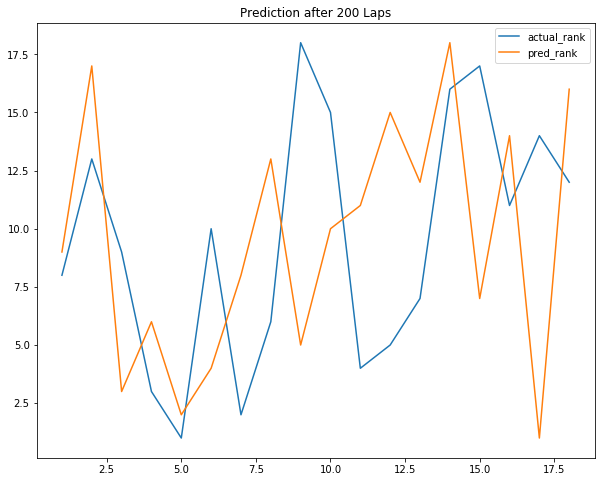

In [0]:
pred_lap_time=[]
for item in carnumber:
  df_fil=df[df['car_number']==item]
  #laptime filter
  df_fil1=df_fil[df_fil['completed_laps']<=199]
  df_temp=df_fil[df_fil['completed_laps']==200]
  if len(df_temp["laptime"].values)>0:

    automodel = arimamodel(df_fil1["laptime"])
    x=plotarima(1, df_fil1["laptime"], automodel)
    pred_lap_time.append(x)

pred_lap_time = list(map(float,pred_lap_time))

pred=list(map(int,ss.rankdata(pred_lap_time)))
df_new=df[df['completed_laps']==200]
df_new=df_new.sort_values(by='car_number', ascending=True)
actual=df_new['overall_rank'].values.tolist()
fig = plt.figure(figsize=(10, 8))
plt.plot(list(range(1,len(actual)+1)),actual,label='actual_rank')
plt.plot(list(range(1,len(actual)+1)),pred,label="pred_rank")

plt.title('Prediction after 200 Laps')

plt.legend()